# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### Feature Scaling

In [ ]:
#We use MinMaxScaler, specially when we have sigmoid as the activation function
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set) 
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

The RNN will consider 60 previous values as in memory to predict the next value at (t+1).

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(1198, 60) (1198,)


### Reshaping

If you want to add a new dimension, you can always think of reshape().

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
rnn = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
#return_sequences = True, because we want to stack some more LSTM layers
rnn.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#20% of the neurons are dropped out at the time of training for regularization 
rnn.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
rnn.add(LSTM(units = 50, return_sequences = True)) 
rnn.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
rnn.add(LSTM(units = 50, return_sequences = True)) 
rnn.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
#Default value of return_sequences is False
rnn.add(LSTM(units = 50))
rnn.add(Dropout(0.2))

### Adding the output layer

In [ ]:
rnn.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
#2 optimizers are very famous for rnn are adam and rmsprop, here we will use adam for better results
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
rnn.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 [==============================] - 14s 121ms/step - loss: 0.0611
Epoch 2/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0055
Epoch 3/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0041
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

(axis = 0) for vertical and (axis = 1) for horizontal concatenation

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_prices = rnn.predict(X_test)
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

1/1 [==============================] - 2s 2s/step


### Visualising the results

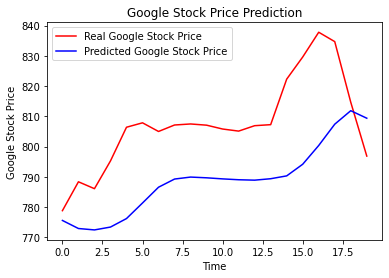

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_prices, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()